#Learning with a finite dictionary

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

class MathsML:
    def __init__(self):
        self.functions = {
            "square": lambda x: x**2,
            "cube": lambda x: x**3,
            "sin": np.sin,
            "cos": np.cos,
            "exp": np.exp,
            "log": np.log,
            "sqrt": np.sqrt
        }

    def add_function(self, name, func):
        """Add a new function to the dictionary."""
        self.functions[name] = func

    def evaluate_function(self, name, x):
        """Evaluate a function from the dictionary at point x."""
        if name in self.functions:
            return self.functions[name](x)
        else:
            raise ValueError(f"Function '{name}' not found in the dictionary.")

    def linear_regression(self, X, y):
        """Simple linear regression model."""
        model = LinearRegression()
        model.fit(X, y)
        return model

    def logistic_regression(self, X, y):
        """Logistic regression model for classification."""
        model = LogisticRegression()
        model.fit(X, y)
        return model

    def decision_tree_regression(self, X, y):
        """Decision tree regression model."""
        model = DecisionTreeRegressor()
        model.fit(X, y)
        return model

    def random_forest_regression(self, X, y):
        """Random forest regression model."""
        model = RandomForestRegressor()
        model.fit(X, y)
        return model

    def support_vector_regression(self, X, y):
        """Support vector regression model."""
        model = SVR()
        model.fit(X, y)
        return model

    def k_nearest_neighbors_regression(self, X, y):
        """K-nearest neighbors regression model."""
        model = KNeighborsRegressor()
        model.fit(X, y)
        return model

    def decision_tree_classification(self, X, y):
        """Decision tree classification model."""
        model = DecisionTreeClassifier()
        model.fit(X, y)
        return model

    def random_forest_classification(self, X, y):
        """Random forest classification model."""
        model = RandomForestClassifier()
        model.fit(X, y)
        return model

    def support_vector_classification(self, X, y):
        """Support vector classification model."""
        model = SVC()
        model.fit(X, y)
        return model

    def k_nearest_neighbors_classification(self, X, y):
        """K-nearest neighbors classification model."""
        model = KNeighborsClassifier()
        model.fit(X, y)
        return model

    def evaluate_regression_model(self, model, X_test, y_test):
        """Evaluate regression model and return MSE."""
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        return mse

    def evaluate_classification_model(self, model, X_test, y_test):
        """Evaluate classification model and return accuracy."""
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a MathsML instance
maths_ml = MathsML()

# Load California housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform linear regression using MathsML
regression_model = maths_ml.linear_regression(X_train_scaled, y_train)
regression_mse = maths_ml.evaluate_regression_model(regression_model, X_test_scaled, y_test)
print("Linear Regression MSE:", regression_mse)

# Perform decision tree regression using MathsML
tree_regression_model = maths_ml.decision_tree_regression(X_train_scaled, y_train)
tree_regression_mse = maths_ml.evaluate_regression_model(tree_regression_model, X_test_scaled, y_test)
print("Decision Tree Regression MSE:", tree_regression_mse)

# Perform random forest regression using MathsML
forest_regression_model = maths_ml.random_forest_regression(X_train_scaled, y_train)
forest_regression_mse = maths_ml.evaluate_regression_model(forest_regression_model, X_test_scaled, y_test)
print("Random Forest Regression MSE:", forest_regression_mse)

# Perform support vector regression using MathsML
svr_model = maths_ml.support_vector_regression(X_train_scaled, y_train)
svr_mse = maths_ml.evaluate_regression_model(svr_model, X_test_scaled, y_test)
print("Support Vector Regression MSE:", svr_mse)

Linear Regression MSE: 0.5558915986952442
Decision Tree Regression MSE: 0.4967386815061289
Random Forest Regression MSE: 0.25439024818970774
Support Vector Regression MSE: 0.3570026426754463


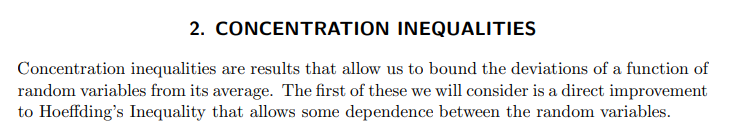

#Azuma-Hoeffding Inequality

In [ ]:
import numpy as np

def azuma_hoeffding_inequality(martingale_diffs, lower_bounds, upper_bounds, t):
    """
    Compute the concentration bound using Azuma-Hoeffding Inequality.

    Args:
        martingale_diffs (array-like): Array of martingale differences ∆i.
        lower_bounds (array-like): Array of lower bounds Ai for martingale differences.
        upper_bounds (array-like): Array of upper bounds Bi for martingale differences.
        t (float): Threshold value for concentration.

    Returns:
        float: Concentration bound probability.
    """
    n = len(martingale_diffs)
    bound_difference_norm = np.linalg.norm(np.array(upper_bounds) - np.array(lower_bounds), ord=np.inf)

    # Compute the right-hand side of the inequality
    rhs = np.exp(- (t**2) / (2 * n * (bound_difference_norm**2)))

    return rhs

# Example usage
if __name__ == "__main__":
    # Define martingale differences, lower bounds, upper bounds, and threshold t
    martingale_diffs = [0.1, -0.2, 0.3, -0.1, 0.2]
    lower_bounds = [0.0, -0.3, 0.2, -0.2, 0.1]
    upper_bounds = [0.2, -0.1, 0.4, 0.0, 0.3]
    t = 1.0

    # Compute concentration bound using Azuma-Hoeffding Inequality
    concentration_bound = azuma_hoeffding_inequality(martingale_diffs, lower_bounds, upper_bounds, t)

    # Print the result
    print(f"Concentration bound probability: {concentration_bound}")

Concentration bound probability: 0.08208499862389883


#Bounded Differences Inequality

In [ ]:
import numpy as np

def bounded_differences_inequality(g, X, c, t):
    """
    Compute the concentration bound using Bounded Differences Inequality.

    Args:
        g (callable): Function g(X) to evaluate.
        X (array-like): Array of input values.
        c (array-like): Array of constants for the bounded differences condition.
        t (float): Threshold value for concentration.

    Returns:
        float: Concentration bound probability.
    """
    n = len(X)
    martingale_diffs = []
    for i in range(n):
        # Create perturbed inputs X' for calculating supremum of differences
        X_perturbed = X.copy()
        X_perturbed[i] += c[i]
        # Calculate martingale difference ∆i
        delta_i = g(X_perturbed) - g(X)
        martingale_diffs.append(delta_i)

    # Compute the supremum of absolute differences
    sup_differences = np.max(np.abs(martingale_diffs))

    # Compute the right-hand side of the inequality
    rhs = 2 * np.exp(- (t**2) / (2 * np.sum([c_i**2 for c_i in c])))

    return rhs

# Example usage
if __name__ == "__main__":
    # Define a function g and constants c
    def g(X):
        return X[0] + X[1] + X[2]

    X_values = [1.2, 2.5, 3.8]  # Input values X1, X2, X3
    constants = [0.5, 0.7, 0.3]  # Constants c1, c2, c3
    threshold = 1.0

    # Compute concentration bound using Bounded Differences Inequality
    concentration_bound = bounded_differences_inequality(g, X_values, constants, threshold)

    # Print the result
    print(f"Concentration bound probability: {concentration_bound}")

Concentration bound probability: 1.0949815808722212


#Bernstein’s Inequality

In [ ]:
import numpy as np

def bernstein_inequality(t, n, variances, c):
    """
    Compute the concentration bound using Bernstein's Inequality.

    Args:
        t (float): Threshold value for concentration.
        n (int): Number of random variables (sample size).
        variances (array-like): Array of variances for each random variable.
        c (float): Bound on the absolute value of each random variable.

    Returns:
        float: Concentration bound probability.
    """
    # Calculate average variance
    sigma2 = np.mean(variances)

    # Compute right-hand side of Bernstein's Inequality
    rhs = np.exp(- n * t**2 / (2 * sigma2 + 2 * c * t / 3))

    return rhs

# Example usage
if __name__ == "__main__":
    # Define parameters for Bernstein's Inequality
    t = 1.0  # Threshold value
    n = 100  # Number of random variables
    variances = np.random.uniform(0.5, 1.5, size=n)  # Variances for each random variable
    c = 1.0  # Bound on absolute value of each random variable

    # Compute concentration bound using Bernstein's Inequality
    concentration_bound = bernstein_inequality(t, n, variances, c)

    # Print the result
    print(f"Concentration bound probability: {concentration_bound}")

Concentration bound probability: 3.235260349498193e-17


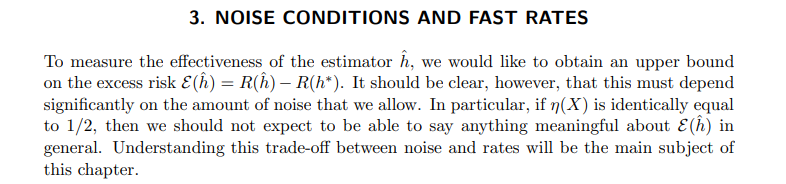

# The Noiseless Case

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def simulate_binary_classification_data(n_samples=1000, n_features=20, random_state=42):
    """Simulate a binary classification dataset."""
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=10,
                               n_clusters_per_class=2, random_state=random_state)
    return X, y

def train_ml_models(X_train, y_train):
    """Train multiple machine learning models."""
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        SVC(),
        KNeighborsClassifier()
    ]
    trained_models = []
    for model in models:
        model.fit(X_train, y_train)
        trained_models.append(model)
    return trained_models

def evaluate_classifier_accuracy(model, X_test, y_test):
    """Evaluate the accuracy of a classifier on test data."""
    return model.score(X_test, y_test)

def apply_bernstein_inequality(M, delta, n, variances):
    """
    Apply Bernstein's Inequality to assess classifier performance.

    Args:
        M (int): Number of classifiers.
        delta (float): Probability threshold for the inequality.
        n (int): Number of data points.
        variances (array-like): Array of classifier accuracies (IP[hj(Xi) = h*(Xi)]).

    Returns:
        float: Bound on the expectation E(h).
    """
    # Compute average variance (sigma^2)
    sigma2 = np.mean(variances)

    # Calculate the threshold value t0(j) for each classifier
    t0_values = np.maximum((2 * sigma2 * np.log(M / delta)) / (4 * n), np.log(M / delta) / (3 * n))

    # Compute the expectation bound E(h) using Bernstein's Inequality
    expectation_bound = np.log(M / delta) / (2 * t0_values)

    return expectation_bound

if __name__ == "__main__":
    # Simulation parameters
    n_samples = 1000
    M = 5  # Number of classifiers
    delta = 0.05  # Probability threshold for Bernstein's Inequality

    # Simulate binary classification data
    X, y = simulate_binary_classification_data(n_samples=n_samples)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train multiple machine learning models
    trained_models = train_ml_models(X_train, y_train)

    # Evaluate classifier accuracies on test data
    accuracies = [evaluate_classifier_accuracy(model, X_test, y_test) for model in trained_models]

    # Apply Bernstein's Inequality to estimate E(h)
    expectation_bound = apply_bernstein_inequality(M, delta, n_samples, accuracies)

    print(f"Bound on E(h): {expectation_bound}")

Bound on E(h): 1112.3470522803116
